In [1]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

In [22]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

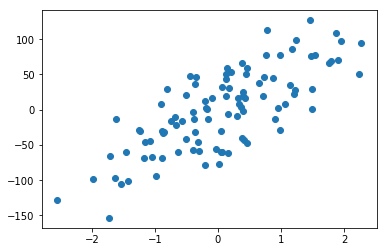

In [23]:
# посмотрим что получилось

pylab.plot(x, y, 'o')
pylab.show()

In [24]:
# размер данных

m, n = np.shape(x)
m, n

(100, 1)

In [25]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[ 1.        , -0.35955316],
       [ 1.        ,  0.97663904],
       [ 1.        ,  0.40234164],
       [ 1.        , -0.81314628],
       [ 1.        , -0.88778575]])

In [26]:
# y лист значений
y[:5]

array([-31.74599395, -28.79914206,  -2.18450294,  28.96679712, -30.8791169 ])

In [27]:
# шаг алгоритма
alpha = 0.01

In [29]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.]
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
        # print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

In [30]:
%%time
theta = gradient_descent_2(alpha, x, y, 1000)

Wall time: 27 ms


In [11]:
theta

array([ -2.84837957,  43.20234847])

In [21]:
model.intercept_, model.coef_

(array([-2.84683698]), array([ 42.76734039]))

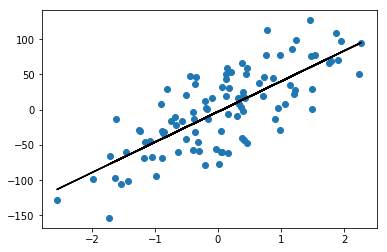

In [12]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    
# рисуем результат
pylab.plot(x[:,1],y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()

In [19]:
theta

array([ -2.84837957,  43.20234847])

In [13]:
from sklearn import linear_model

In [14]:
model = linear_model.SGDRegressor( alpha = 0.01, n_iter = 1000 )

In [15]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

In [31]:
%%time 

model.fit( x, y )

Wall time: 12 ms


SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=1000, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [17]:
y_predict_sgd = model.predict( x )

In [20]:
model.intercept_

array([-2.84683698])

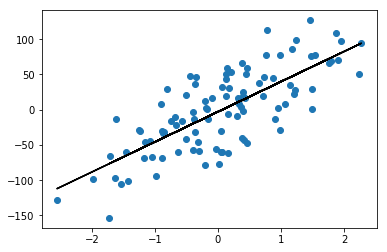

In [18]:
pylab.plot(x, y, 'o')
pylab.plot(x, y_predict_sgd, 'k-')
pylab.show()